In [38]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [4]:
!dir

 Le volume dans le lecteur C n'a pas de nom.
 Le num‚ro de s‚rie du volume est CEA2-037F

 R‚pertoire de C:\Users\user36505\Documents\OFF\OFF_proj\notebooks

05/10/2023  15:48    <DIR>          .
05/10/2023  15:48    <DIR>          ..
05/10/2023  15:06                 0 .gitkeep
05/10/2023  15:39    <DIR>          .ipynb_checkpoints
05/10/2023  15:48            20ÿ076 1-VC-Exploration.ipynb
               2 fichier(s)           20ÿ076 octets
               3 R‚p(s)  414ÿ426ÿ673ÿ152 octets libres


In [5]:
OFF_FILEPATH = "../data/raw/list.csv.gz"

In [7]:
df = pd.read_csv(OFF_FILEPATH, sep='\t', nrows=10_000)

In [8]:
df.shape

(10000, 203)

In [28]:
cols = {'product_name' : 'string',
'main_category_en' : 'category',
'energy-kcal_100g' : 'float32',
'nutriscore_grade' : 'category',
'nutriscore_score' : 'float32',
'ingredients_text' : 'string'}

In [32]:
%time
nrows=4_000_000
chunksize=20_000
df = pd.DataFrame() 
for chunk_df in pd.read_csv(OFF_FILEPATH, 
            sep='\t', 
            usecols=cols.keys(),
            chunksize=chunksize,
            on_bad_lines='skip'
                ):
    df=pd.concat([df, chunk_df.dropna()])

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\user36505\AppData\Local\Temp\ipykernel_8004\2108367955.py:5: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk_df in pd.read_csv(OFF_FILEPATH,


In [33]:
df

,product_name,ingredients_text,nutriscore_score,nutriscore_grade,main_category_en,energy-kcal_100g
81,BAguette bressan,"Bâguette Bressan Pain baguette 46,2%,' farine ...",-4.0,a,Baguettes,160.0
199,Pâte a tartiner,"50% noisettes locales (82), 29% sucre de canne...",19.0,e,Hazelnut spreads,465.0
309,Cranberries,"Cranberries, sugar, sunflower oil.",8.0,c,Cranberries,300.0
371,Salade Cesar,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,16.0,d,Leaf vegetables,290.0
420,Chaussons tressés aux pommes,"Pâte (farine, margarines d'huile de palme et d...",9.0,c,Apple turnovers,260.0
...,...,...,...,...,...,...
2986183,Tofu nature,"_Sojabohnen_* 55%, Wasser, Gerinnungsmittel: M...",-3.0,a,Plain tofu,119.0
2986222,ggg,ffggg,27.0,e,Ffgg,221.0
2986235,Minis beignets,"MATIÈRE GRASSE DU LAIT BABEURRE (34%), FARINE ...",15.0,d,Sweet Fritters,333.0
2986239,Steak haché 5%,"VIANDE HACHEE PUR BOEUF 5% M,G, POURCENTAGE DE...",-2.0,a,Viandes,131.0


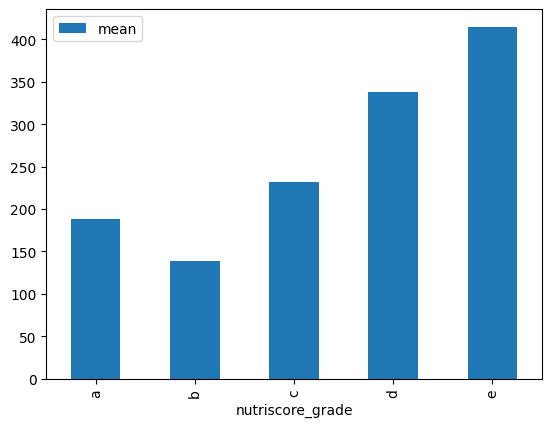

In [39]:
df.groupby('nutriscore_grade')['energy-kcal_100g'].agg(['mean']).plot(kind='bar');

In [41]:
df['nutriscore_score'].plot(kind='bar')

TypeError: no numeric data to plot